<a href="https://colab.research.google.com/github/Zarathos01/Machine-learning-is-fun/blob/main/ECG%20Heartbeat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
!kaggle datasets download shayanfazeli/heartbeat

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
heartbeat.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
replace mitbih_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mitbih_test.csv         
replace mitbih_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mitbih_train.csv        
replace ptbdb_abnormal.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ptbdb_normal.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
df = pd.read_csv('/content/mitbih_train.csv', header=None)
test = pd.read_csv('/content/mitbih_test.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
test

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [ ]:
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
183,0
184,0
185,0
186,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,87554.0,0.890360,0.240909,0.0,0.921922,0.991342,1.000000,1.0
1,87554.0,0.758160,0.221813,0.0,0.682486,0.826013,0.910506,1.0
2,87554.0,0.423972,0.227305,0.0,0.250969,0.429472,0.578767,1.0
3,87554.0,0.219104,0.206878,0.0,0.048458,0.166000,0.341727,1.0
4,87554.0,0.201127,0.177058,0.0,0.082329,0.147878,0.258993,1.0
...,...,...,...,...,...,...,...,...
183,87554.0,0.003471,0.036255,0.0,0.000000,0.000000,0.000000,1.0
184,87554.0,0.003221,0.034789,0.0,0.000000,0.000000,0.000000,1.0
185,87554.0,0.002945,0.032865,0.0,0.000000,0.000000,0.000000,1.0
186,87554.0,0.002807,0.031924,0.0,0.000000,0.000000,0.000000,1.0


In [ ]:
df.duplicated().any()

False

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
y.value_counts()

,count
187,
0.0,72471
4.0,6431
2.0,5788
1.0,2223
3.0,641


In [ ]:
'''from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)'''

"from imblearn.over_sampling import SMOTE\nsmote = SMOTE(sampling_strategy='auto', random_state=42)\nX_resampled, y_resampled = smote.fit_resample(X, y)"

In [ ]:
'''y_resampled.value_counts()'''

'y_resampled.value_counts()'

In [ ]:
'''from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply under-sampling to the training data
X_resampled, y_resampled = undersampler.fit_resample(X, y)'''

"from imblearn.under_sampling import RandomUnderSampler\nundersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)\n\n# Apply under-sampling to the training data\nX_resampled, y_resampled = undersampler.fit_resample(X, y)"

In [ ]:
'''y_resampled.value_counts()'''

'y_resampled.value_counts()'

In [ ]:
'''X_train = tf.convert_to_tensor(X_resampled)
y_train = tf.convert_to_tensor(y_resampled)

X_test = tf.cast(X_test, dtype=tf.float32)  # Cast X_test to tf.float32
y_test = tf.cast(y_test, dtype=tf.int32)'''

'X_train = tf.convert_to_tensor(X_resampled)\ny_train = tf.convert_to_tensor(y_resampled)\n\nX_test = tf.cast(X_test, dtype=tf.float32)  # Cast X_test to tf.float32\ny_test = tf.cast(y_test, dtype=tf.int32)'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

input_shape = X_train.shape[1]

# Define the model
model = Sequential()

# Add output layer for binary classification
model.add(Dense(512,input_shape=(input_shape,) ,activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 512)                 │          96,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,061 (1.03 MB)

 Trainable params: 269,061 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # or 'val_accuracy' depending on your preference
    patience=8,          # Number of epochs with no improvement before stopping
    verbose=1,           # Show when training stops
    restore_best_weights=True  # Restore the best weights when stopping
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9305 - loss: 0.2520 - val_accuracy: 0.9631 - val_loss: 0.1380
Epoch 2/100
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9663 - loss: 0.1196 - val_accuracy: 0.9695 - val_loss: 0.1113
Epoch 3/100
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9712 - loss: 0.1013 - val_accuracy: 0.9734 - val_loss: 0.0965
Epoch 4/100
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9758 - loss: 0.0843 - val_accuracy: 0.9753 - val_loss: 0.0909
Epoch 5/100
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9777 - loss: 0.0737 - val_accuracy: 0.9766 - val_loss: 0.0829
Epoch 6/100
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9783 - loss: 0.0699 - val_accuracy: 0.9785 - val_loss: 0.0839
Epoch 7/100
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9808 - loss: 0.0638 - val_accuracy: 0.9762 - val_loss: 0.0934
Epoch 8/100
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9822 -

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 97.91%


In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

685/685 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     18118
         1.0       0.90      0.67      0.77       556
         2.0       0.94      0.95      0.94      1448
         3.0       0.86      0.67      0.75       162
         4.0       0.98      0.98      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.93      0.85      0.89     21892
weighted avg       0.98      0.98      0.98     21892



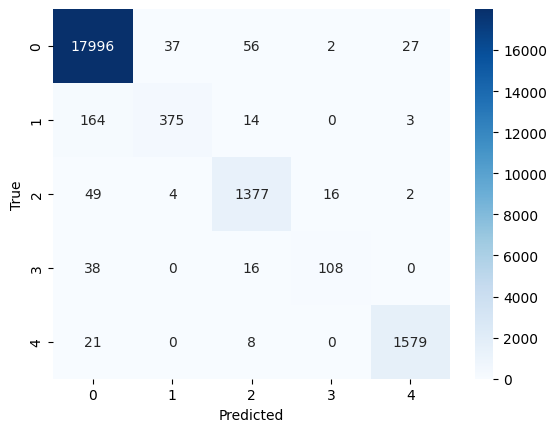

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# CNN model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(input_shape, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 185, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 92, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 90, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 45, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 5760)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 5)                   │          28,805 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,765 (210.02 KB)

 Trainable params: 53,765 (210.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 63s 28ms/step - accuracy: 0.9252 - loss: 0.2786 - val_accuracy: 0.9626 - val_loss: 0.1383
Epoch 2/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 75s 25ms/step - accuracy: 0.9677 - loss: 0.1192 - val_accuracy: 0.9685 - val_loss: 0.1172
Epoch 3/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9739 - loss: 0.0955 - val_accuracy: 0.9736 - val_loss: 0.1044
Epoch 4/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9767 - loss: 0.0798 - val_accuracy: 0.9746 - val_loss: 0.0993
Epoch 5/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 55s 25ms/step - accuracy: 0.9801 - loss: 0.0675 - val_accuracy: 0.9759 - val_loss: 0.0976
Epoch 6/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 86s 27ms/step - accuracy: 0.9821 - loss: 0.0604 - val_accuracy: 0.9772 - val_loss: 0.0936
Epoch 7/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 59s 27ms/step - accuracy: 0.9837 - loss: 0.0552 - val_accuracy: 0.9754 - val_loss: 0.0970
Epoch 8/50
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 75s 24ms/step - accuracy: 0.9829 -

In [ ]:
# Evaluate performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

685/685 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9919 - loss: 0.0336
Test Accuracy: 0.98


In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))

685/685 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18118
         1.0       0.90      0.65      0.76       556
         2.0       0.96      0.91      0.93      1448
         3.0       0.80      0.72      0.76       162
         4.0       0.99      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.93      0.85      0.88     21892
weighted avg       0.98      0.98      0.98     21892

